In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import itertools
import matplotlib.style as style
import os


In [2]:

import warnings
warnings.resetwarnings()
warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
warnings.filterwarnings('ignore', '.*SettingWithCopyWarning*')

pd.set_option('display.max_colwidth', -1)  
pd.set_option('display.max_rows', None)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [3]:
from close import CLOSE

In [4]:

DBSCAN_METRIC = 'euclidean'
DBSCAN_METRIC_PARAMS = None
DBSCAN_ALGORITHM = 'auto'
DBSCAN_LEAF_SIZE = 30
DBSCAN_P = None
DBSCAN_N_JOBS = None

NO_TIMEPOINTS = 4
DBSCAN_MINPTS = 2
EVAL_FUNCTION = 'mse'

csv_name = os.path.join('', 'generated_data_pakdd_trans.csv')
t_data = pd.read_csv(csv_name)


In [5]:
t_data

,object_id,time,feature1,feature2
0,1,1,0.316191,0.135757
1,2,1,0.262523,0.174642
2,3,1,0.293755,0.242488
3,4,1,0.182208,0.090413
4,5,1,0.330589,0.171297
5,6,1,0.315892,0.085165
6,7,1,0.252514,0.229051
7,8,1,0.209189,0.273798
8,9,1,0.343722,0.090861
9,10,1,0.168526,0.193026


In [6]:
def normalize(data):
    Distance = data[['feature1']].values.astype(float)
    arrdelay = data[['feature2']].values.astype(float)

    min_max_scaler_dep = preprocessing.MinMaxScaler()
    dep_scaled = min_max_scaler_dep.fit_transform(Distance)

    min_max_scaler_arr = preprocessing.MinMaxScaler()
    arr_scaled = min_max_scaler_arr.fit_transform(arrdelay)

    data['feature1'] = dep_scaled
    data['feature2'] = arr_scaled

    return data


In [9]:
from cluster_creator import return_clustering_1

In [10]:
def create_kmeans_clusters(data, n):
    clusters=pd.DataFrame()
    cluster_count = 0
    for timestamp in data['time'].unique() :
        timepoint_data = data.loc[data['time'] == timestamp]


        cluster_data = [tuple(x) for x in timepoint_data.iloc[:,2:].values]

        #clustering = DBSCAN(eps, minpts, DBSCAN_METRIC,
         #                   DBSCAN_METRIC_PARAMS, DBSCAN_ALGORITHM,
          #                  DBSCAN_LEAF_SIZE, DBSCAN_N_JOBS).fit(cluster_data)

        clustering = KMeans(n_clusters=n).fit(cluster_data)
        

        for i in range(0,len(clustering.labels_)):
            if clustering.labels_[i] > -1:
                clustering.labels_[i] = clustering.labels_[i] + cluster_count
        if np.max(clustering.labels_) < 0:
            cluster_count = np.max(clustering.labels_ * (-1)) + 1
        else:
            cluster_count = np.max(clustering.labels_) + 1
        idx =  np.array(range(timestamp*len(clustering.labels_)
                     ,timestamp*len(clustering.labels_)+len(clustering.labels_)))
        labels_df = pd.DataFrame({'cluster': clustering.labels_, 'idx': idx})
        labels_df = labels_df.set_index('idx')
        timepoint_data.loc[:,'idx'] = pd.Series(range(timestamp*len(clustering.labels_)
                                                    ,timestamp*len(clustering.labels_)+len(clustering.labels_)),
                                                    index=timepoint_data.index)
        timepoint_data = timepoint_data.set_index(['idx'])
        clusters = clusters.append(timepoint_data.join(labels_df))

    return clusters


2


/home/alex/projektArbeit/my_tests/cluster_creator.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i][col_name] = i


Average Quality:  0.05958654181168399
Average Stability:  0.6926392857142857
New MAX Leader 2
New MIN Leader 2
New Mid Leader 2
k: 2
Total Clustering Score:  0.48476036794792443
3


/home/alex/projektArbeit/my_tests/cluster_creator.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i][col_name] = i


Average Quality:  0.027509820941832863
Average Stability:  1.0042916666666664
New MAX Leader 3
k: 3
Total Clustering Score:  0.853275705160656
4


/home/alex/projektArbeit/my_tests/cluster_creator.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i][col_name] = i


Average Quality:  0.033429079269540675
Average Stability:  0.8963421861471863
k: 4
Total Clustering Score:  0.8051874597139331
5


/home/alex/projektArbeit/my_tests/cluster_creator.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i][col_name] = i


Average Quality:  0.0479700136959197
Average Stability:  0.7443134761904762
k: 5
Total Clustering Score:  0.6767857632052118
6


/home/alex/projektArbeit/my_tests/cluster_creator.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i][col_name] = i


Average Quality:  0.028574897305519237
Average Stability:  0.8559860863095238
k: 6
Total Clustering Score:  0.8081783561088455
7


/home/alex/projektArbeit/my_tests/cluster_creator.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i][col_name] = i


Average Quality:  0.03044653150652115
Average Stability:  0.7081805059523809
k: 7
Total Clustering Score:  0.6720891270620427
8


/home/alex/projektArbeit/my_tests/cluster_creator.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i][col_name] = i


Average Quality:  0.018561288688816895
Average Stability:  0.728087638888889
k: 8
Total Clustering Score:  0.6960229119081071
9


/home/alex/projektArbeit/my_tests/cluster_creator.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i][col_name] = i


Average Quality:  0.021284758799384698
Average Stability:  0.7742746406525574
k: 9
Total Clustering Score:  0.7457674525524559
10


/home/alex/projektArbeit/my_tests/cluster_creator.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i][col_name] = i


Average Quality:  0.019681077730714692
Average Stability:  0.8217427777777779
k: 10
Total Clustering Score:  0.7937157000853776


/home/alex/.local/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/alex/.local/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/alex/.local/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

{'k': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'close': [0.48476036794792443, 0.853275705160656, 0.8051874597139331, 0.6767857632052118, 0.8081783561088455, 0.6720891270620427, 0.6960229119081071, 0.7457674525524559, 0.7937157000853776], 'quality': [0.940413458188316, 0.9724901790581671, 0.9665709207304594, 0.9520299863040803, 0.9714251026944808, 0.9695534684934789, 0.9814387113111831, 0.9787152412006153, 0.9803189222692853], 'stability': [0.6926392857142857, 1.0042916666666664, 0.8963421861471863, 0.7443134761904762, 0.8559860863095238, 0.7081805059523809, 0.728087638888889, 0.7742746406525574, 0.8217427777777779]}


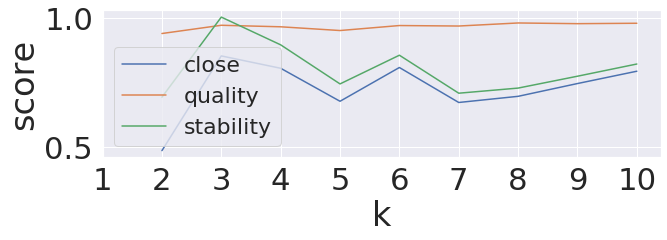

In [14]:
    max_score = -2.0
    max_k = 0.0
    min_score = 2.0
    min_k = 0.0
    mid_score = 2.0
    mid_k = 0.0

    k_list = []
    scores_list = []
    quality_list = []
    stability_list = []
    global t_data
    for k in range(2, 11, 1):
        #changed from start=1 to start=2
        
        t_data = t_data[t_data['time'].isin(t_data['time'].unique()[:NO_TIMEPOINTS])]
        c_data = normalize(t_data)
        
        #c_data = create_kmeans_clusters(t_data, k)
        
        c_data = return_clustering_1(data=t_data, n=k, score=0.8)
        
        # plot = plotTimePoints(c_data, NO_TIMEPOINTS)
        columns = ['object_id', 'time', 'cluster', 'feature1', 'feature2']
        c_data = c_data[columns]
        c_data = normalize(c_data)
        rater = CLOSE(c_data)
        scores = rater.rate_clustering(return_measures=True)
        clustering_score = scores['close']
        quality_score = scores['quality']
        stability_score = scores['stability']

        if clustering_score > max_score:
            max_score = clustering_score
            print('New MAX Leader ' + str(k))
            max_k = k

        if clustering_score < min_score:
            min_score = clustering_score
            print('New MIN Leader ' + str(k))
            min_k = k
            
        if abs(clustering_score) < mid_score:
            mid_score = abs(clustering_score)
            print('New Mid Leader ' + str(k))
            mid_k = k
        print('k: ' + str(k))
        print('Total Clustering Score: ', str(clustering_score))
        # plot.show()

        k_list.append(k)
        scores_list.append(clustering_score)
        quality_list.append(1 - quality_score)
        stability_list.append(stability_score)

    d = {'k': k_list, 'close': scores_list, 'quality': quality_list, 'stability': stability_list}
    d_frame = pd.DataFrame(d)
    sns.set_style("whitegrid", {'axes.grid': True, 'axes.edgecolor': 'black'})
    sns.set(font='CMU Serif', font_scale=2.8, rc={'figure.figsize':(12, 6)})
    ax = sns.lineplot(x='k', y='score', hue='variable', data=pd.melt(d_frame, ['k'], value_name='score'), dashes=True)
    ax.set(xticks=np.arange(1,11,1))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:], fontsize='22')
    plt.gcf().subplots_adjust(bottom=0.2)



    # print('MAX, MIN, MID ' + str(max_k) + ' ' + str(min_k) + ' ' + str(mid_k))
    dataset_name = ""
    c_data = create_kmeans_clusters(t_data, max_k)
    if csv_name == 'generated_data_pakdd_trans.csv':
        title = 'Data Set B'
        dataset_name = "B"
    elif csv_name == 'generated_data_pakdd_trans2.csv':
        title = 'Data Set A'
        dataset_name = "A"
    else:

        title = 'k='+str(max_k)
    # plt.gcf().savefig('images/' + '4_graph_trans_' + dataset_name + '.png')
    # plot = plotTimePoints(c_data, NO_TIMEPOINTS, title)
    plt.gcf().set_size_inches(10, 3)
    # plot.savefig('images/' + '4_best_trans_' + dataset_name + '.png')

    # plot.show()
    # plot.show()

    # c_data = create_kmeans_clusters(t_data, min_k)
    # plot = plotTimePoints(c_data, NO_TIMEPOINTS, 'k='+str(min_k))
    # plot.show()
    #
    # c_data = create_kmeans_clusters(t_data, mid_k)
    # plot = plotTimePoints(c_data, NO_TIMEPOINTS, 'k='+str(mid_k))
    # plot.show()
    #
    # c_data = create_kmeans_clusters(t_data, 3)
    # plot = plotTimePoints(c_data, NO_TIMEPOINTS, 'k='+str(3))
    # plot.show()
    print(d)


In [ ]:
c_data

In [12]:
t_data

,object_id,time,feature1,feature2
0,1,1,0.232429,0.071489
1,2,1,0.164896,0.117807
2,3,1,0.204196,0.198624
3,4,1,0.063831,0.017476
4,5,1,0.250546,0.113823
5,6,1,0.232052,0.011224
6,7,1,0.152300,0.182619
7,8,1,0.097782,0.235920
8,9,1,0.267072,0.018010
9,10,1,0.046613,0.139706
